In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import gc

In [2]:
train = pd.read_csv("data/training_set_VU_DM.csv")

In [3]:
search_ids = train.srch_id.unique()
print(f'There are {len(search_ids)} searches in the training set and {len(train)} data points')
df = train
#df = train[train.srch_id.isin(random.sample(list(search_ids), int(0.1 * len(search_ids))))]
print(f'There are {len(df.srch_id.unique())} searches in the smaller training set and {len(df)} data points')

There are 199795 searches in the training set and 4958347 data points
There are 199795 searches in the smaller training set and 4958347 data points


Next, we downsample the smaller training set as the data is very imbalanced. We take 5 negatives for every positive instance.

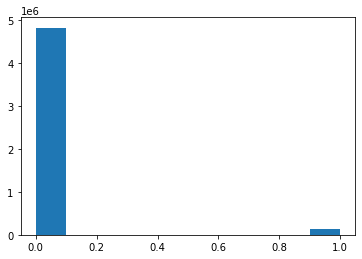

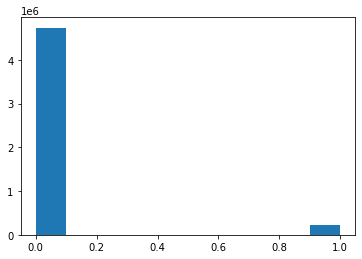

In [5]:
plt.hist(df.booking_bool)
plt.show()

plt.hist(df.click_bool)
plt.show()

In [6]:
keep = df[(df.booking_bool==1) | (df.click_bool==1)] # keep all clicked and/or booked
avg_keep = keep.groupby('srch_id').size().mean() # average amount of clicks/bools per search
print(f'On average, there are {avg_keep} clicks/bookings per search')

majority = df[(df.booking_bool==0) & (df.click_bool==0)] # not clicked AND not booked
majority_keep = majority.groupby('srch_id').head(int(5*avg_keep)).reset_index(drop=True) # we take 5 negatives for every positive

On average, there are 1.1105332966290449 clicks/bookings per search


In [7]:
df = pd.concat([keep, majority_keep], ignore_index=True).sort_values('srch_id')
del keep
del majority_keep
gc.collect()

6478

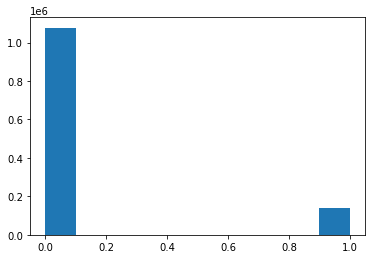

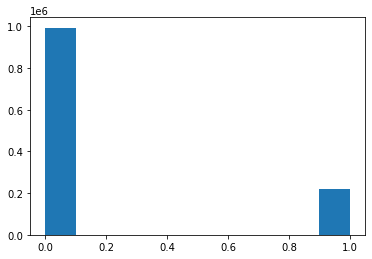

In [8]:
plt.hist(df.booking_bool)
plt.show()

plt.hist(df.click_bool)
plt.show()

In [9]:
df.to_csv("data/training_set_VU_DM_small_downsampled.csv", index=False)